# UBER Data Analysis 

Introduction:
Uber has revolutionized the transportation industry with its innovative ride-sharing platform, connecting passengers with drivers through a seamless mobile application. Since its launch in 2009, Uber has grown exponentially, expanding its operations to over 900 metropolitan areas worldwide. As a result, the company has accumulated vast amounts of data, providing valuable insights into various aspects of urban transportation.

The aim of this data analysis project is to explore and analyze Uber's extensive dataset to uncover trends, patterns, and valuable information that can help us better understand the dynamics of this evolving industry. By delving into the data, we can gain insights into factors such as demand patterns, rider behavior, and the impact of external factors on Uber's operations.

This Kaggle Uber dataset contains information about 1155 rides of a single Uber user in 2016. The features include the trip date, source, destination, distance traveled, and purpose of the trip.
Dataset - https://www.kaggle.com/datasets/zusmani/uberdrives

In [21]:
# Let's import the necessary Python libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

In [22]:
# Loading the CSV using Pandas and taking a quick look inside the dataset below.
uber_data = pd.read_csv("uber-dataset.csv")

In [23]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


We can see that there are seven different features such as

START DATE, END DATE, CATEGORY, START POINT, STOP POINT, MILES TRAVELLED AND PURPOSE

In [24]:
# Let's rename the features
uber_data = uber_data.rename(columns = {"START_DATE*" : "START_DATE",
                            "END_DATE*" : "END_DATE",
                            "CATEGORY*" : "CATEGORY",
                            "START*" : "START",
                            "STOP*" : "STOP",
                            "MILES*": "MILES",
                            "PURPOSE*" : "PURPOSE"})

In [25]:
# Before proceeding, check for unwanted values.
uber_data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [26]:
# Let's drop the unwanted values
uber_data = uber_data.dropna()

In [27]:
# We can see that the unwanted values are dropped
uber_data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [28]:
# Let's change the format of START_DATE to YYYY-MM-DD TIME format
uber_data["START_DATE"] = pd.to_datetime(uber_data["START_DATE"], format="%m/%d/%Y %H:%M")

In [30]:
# We can see the information in a much clearly way
uber_data["START_DATE"].head()

0   2016-01-01 21:11:00
2   2016-01-02 20:25:00
3   2016-01-05 17:31:00
4   2016-01-06 14:42:00
5   2016-01-06 17:15:00
Name: START_DATE, dtype: datetime64[ns]

In [33]:
# Let's change the format of other features too
uber_data["END_DATE"] = pd.to_datetime(uber_data["END_DATE"], format="%m/%d/%Y %H:%M")

In [58]:
#create new feature representing time of the ride - morning, afternoon, evening, night
uber_data["TIME_OF_DAY"] = [x.hour for x in uber_data["START_DATE"]]
uber_data['TIME_OF_DAY'] = pd.cut(x = uber_data['TIME_OF_DAY'], bins = [0, 6, 11, 17, 21, 24],\
                             labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)

In [59]:
#create new feature representing day of the month of the ride
uber_data["DAY_OF_MONTH"] = [x.day for x in uber_data["START_DATE"]]

In [61]:
#create new feature representing month of the ride
uber_data["MONTH"] = [x.month for x in uber_data["START_DATE"]]
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
uber_data['MONTH'] = uber_data['MONTH'].map(month_label)

In [62]:
#create new feature representing day (week) of the ride
uber_data["DAY_OF_THE_RIDE"] = [calendar.day_name[x.dayofweek] for x in uber_data["START_DATE"]]

In [117]:
# duration of the ride
uber_data['DURATION_OF_THE_RIDE'] = pd.to_timedelta(uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60

In [60]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_OF_DAY,DAY_OF_MONTH,MONTH,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Evening,1,Jan,Friday,0 days 00:06:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Evening,2,Jan,Saturday,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Afternoon,5,Jan,Tuesday,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Afternoon,6,Jan,Wednesday,0 days 01:07:00
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Afternoon,6,Jan,Wednesday,0 days 00:04:00


In [65]:
# summary statistics of the dataset
uber_data.describe()

,START_DATE,END_DATE,MILES,DAY_OF_MONTH,DURATION_OF_THE_RIDE
count,653,653,653.000000,653.000000,653
mean,2016-06-29 03:41:21.041347584,2016-06-29 04:04:44.931087360,11.196325,15.719755,0 days 00:23:23
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,1.000000,0 days 00:02:00
25%,2016-03-07 12:10:00,2016-03-07 12:26:00,3.200000,8.000000,0 days 00:11:00
50%,2016-06-06 21:08:00,2016-06-06 21:37:00,6.400000,16.000000,0 days 00:18:00
75%,2016-11-18 21:23:00,2016-11-18 21:34:00,10.400000,23.000000,0 days 00:28:00
max,2016-12-31 22:08:00,2016-12-31 23:51:00,310.300000,31.000000,0 days 05:30:00
std,NaN,NaN,22.986429,8.840242,0 days 00:25:46


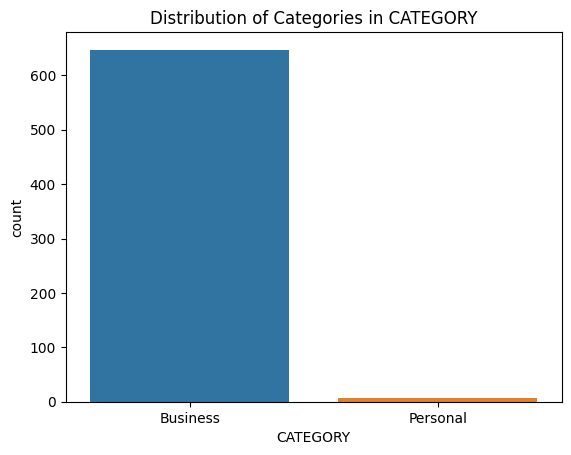

In [73]:
fig, ax = plt.subplots()

# label distribution for CATEGORY
sns.countplot(x=uber_data['CATEGORY'])
ax.set_title('Distribution of Categories in CATEGORY');

Insights:
There are two categories for each ride - business and personal. Most of the rides (around 90%) belong to the business category.

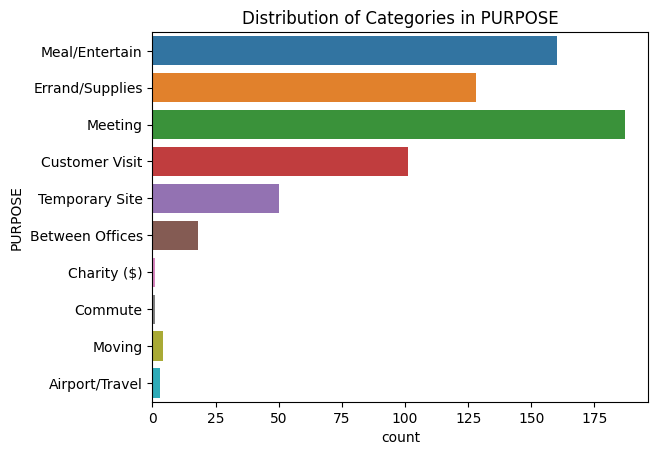

In [76]:
fig, ax = plt.subplots()

# label distribution for PURPOSE
sns.countplot(y=uber_data['PURPOSE'])
ax.set_title('Distribution of Categories in PURPOSE');

Insights: Top 4 purposes of the ride are - meeting, meal/entertainment, errand/supplies, and customer visit.

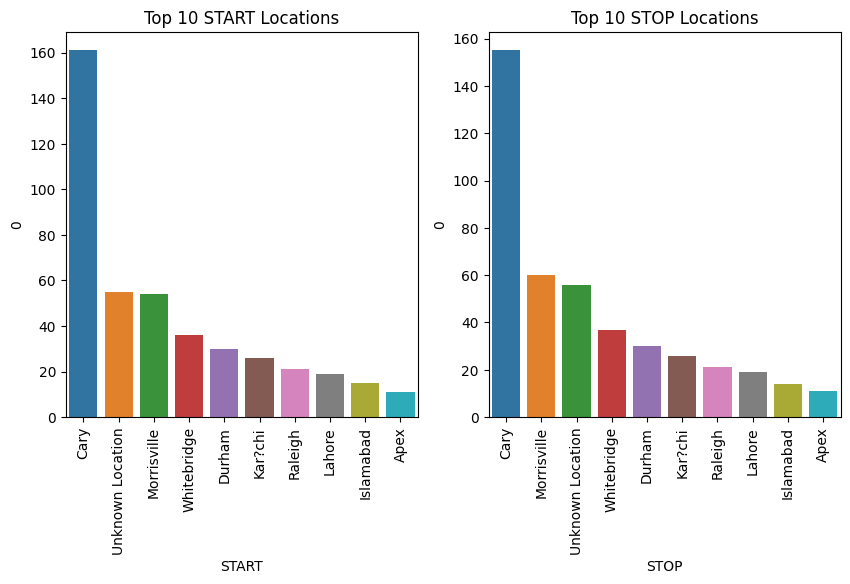

In [88]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(10, 5))

# top 10 locations for START and STOP
temp = pd.DataFrame(uber_data.groupby('START').size()).nlargest(10, columns = 0).reset_index(drop = False)
sns.barplot(x = 'START', y = 0, data = temp, ax = ax1)
ax1.set_title('Top 10 START Locations')
ax1.tick_params(axis='x', rotation = 90)

temp = pd.DataFrame(uber_data.groupby('STOP').size()).nlargest(10, columns = 0).reset_index(drop = False)
sns.barplot(x = 'STOP', y = 0, data = temp, ax = ax2)
ax2.set_title('Top 10 STOP Locations')
ax2.tick_params(axis='x', rotation = 90);

Insights: Top 4 locations for both start and stop are - Cary, Morrisville, Whitebridge, and Durham.

Let’s explore the count of the rides based on the time of the day. As we can see below, most of the rides are started during the afternoon, and the least number of rides are started at night.

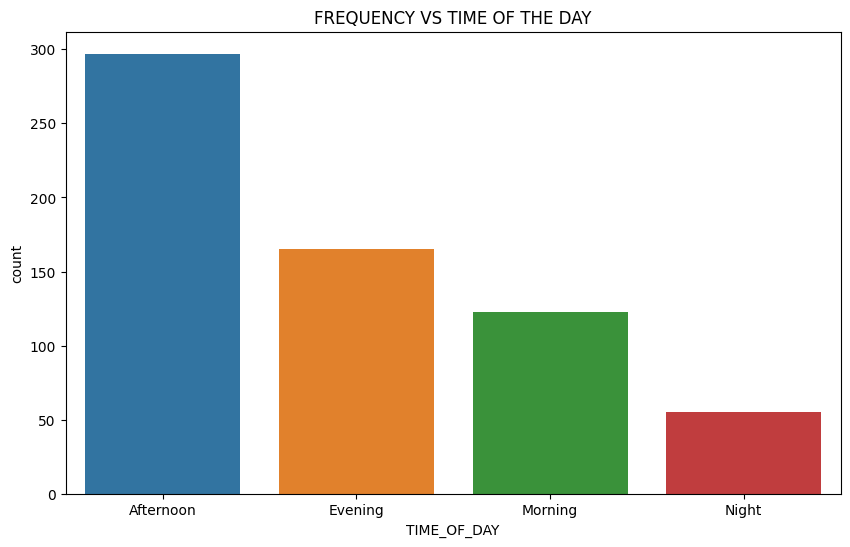

In [135]:
# distribution of rides based on time of the day
plt.figure(figsize = (10,6))
sns.countplot(x=uber_data['TIME_OF_DAY'])
plt.title('FREQUENCY VS TIME OF THE DAY');

Let’s explore the count of the rides based on the month of the day. As we can see below, most rides were completed during December, November. A good number of rides are also distributed across Feb, March, June, and July. August has the least number of rides.

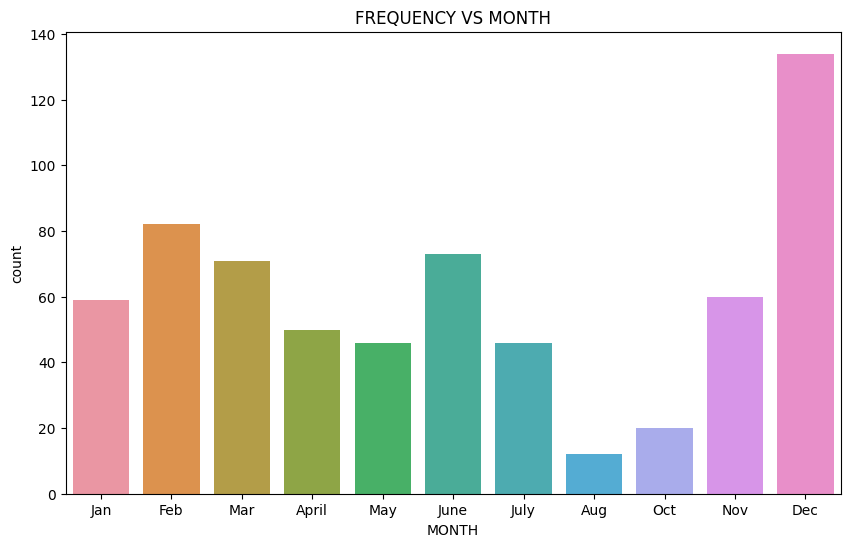

In [132]:
# distribution of rides based on month
plt.figure(figsize = (10,6))
sns.countplot(x=uber_data['MONTH'])
plt.title('FREQUENCY VS MONTH');

Let’s explore the count of the rides based on the day of the week. As we can see below, the maximum number of rides are requested on Friday, and Wednesday has the least number of rides.

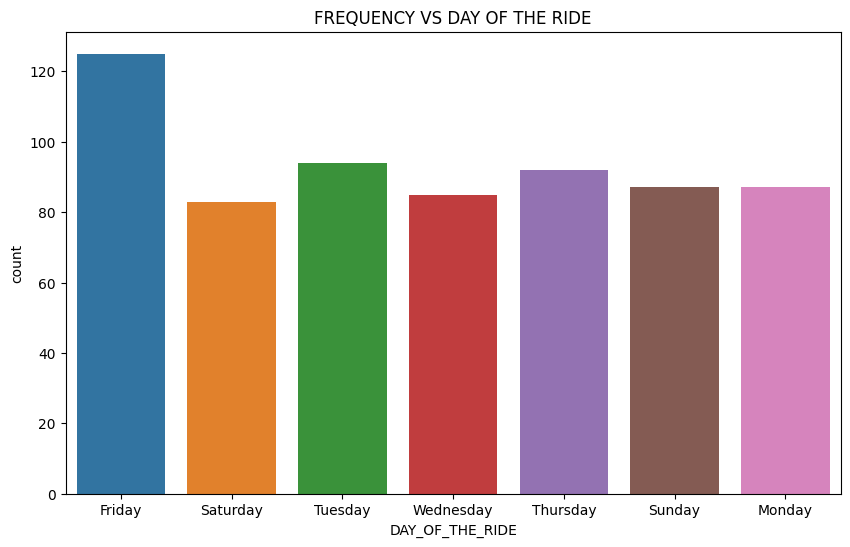

In [133]:
# distribution of rides based on type of day
plt.figure(figsize = (10,6))
sns.countplot(x=uber_data['DAY_OF_THE_RIDE'])
plt.title('FREQUENCY VS DAY OF THE RIDE');

Let’s explore the average duration of each ride based on the month. As we can see below, October has the highest average for the duration but has less number of rides based on the previous explorations.

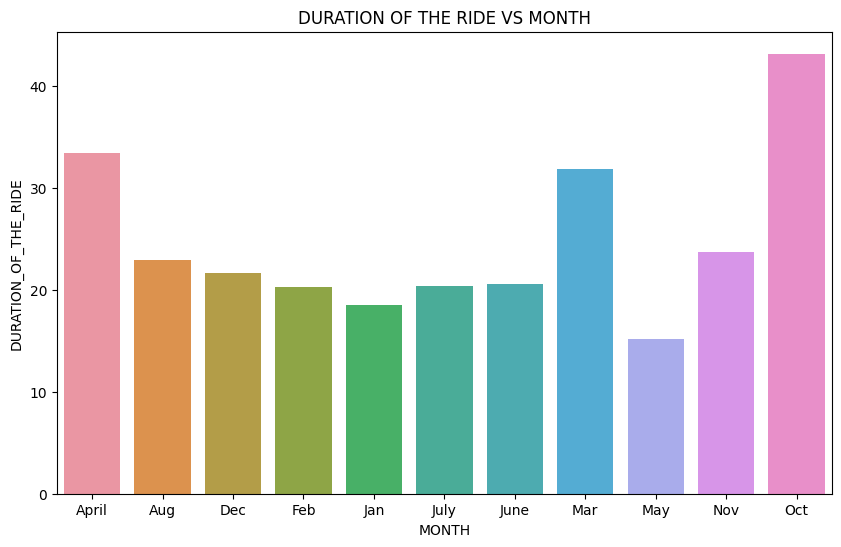

In [131]:
# distribution of rides based on duration of rides for different months
plt.figure(figsize=(10,6))
temp = uber_data.groupby(['MONTH'])['DURATION_OF_THE_RIDE'].mean().reset_index()
sns.barplot(x='MONTH', y='DURATION_OF_THE_RIDE', data=temp)
plt.title('DURATION OF THE RIDE VS MONTH');

Key Insights:

* There are two categories for each ride - business and personal. Most of the rides (around 90%) belong to the business category.
    
* Top 4 purposes of the ride are - meeting, meal/entertainment, errand/supplies, and customer visit.
    
* Top 4 locations for both start and stop are - Cary, Morrisville, Whitebridge, and Gurahm.

* Most of the rides are started during the afternoon, and the least number of rides are started at night.

* Most rides were completed during December, November. A good number of rides are also distributed across Feb, March, June, and July. August has the least number of rides.

* Maximum number of rides are requested on Friday, and Wednesday has the least number of rides.

* October has the highest average for the duration but has less number of rides based on the previous explorations.

We applied various visualization techniques to explore the distribution of categories in the categorical features. We also explored trends of the ride count based on time, the month of the day, and the day of the week. We also explored the average duration for each month.